In [10]:
from PRAN import PRAN

from TransferModel import TransferModel

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

import torch
from torch import nn, optim
from torch.autograd.variable import Variable
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv('../data/hepatitis.csv')
df = df.drop(['Unnamed: 0'], axis = 1)
df

,Class,AGE,SEX,STEROID,ANTIVIRALS,FATIGUE,MALAISE,ANOREXIA,LIVER BIG,LIVER FIRM,SPLEEN PALPABLE,SPIDERS,ASCITES,VARICES,BILIRUBIN,ALK PHOSPHATE,SGOT,ALBUMIN,PROTIME,HISTOLOGY
0,0,30,2,1,2,2,2,2,1,2,2,2,2,2,1.0,85.000000,18.0,4.0,61.852273,1
1,0,50,1,1,2,1,2,2,1,2,2,2,2,2,0.9,135.000000,42.0,3.5,61.852273,1
2,0,78,1,2,2,1,2,2,2,2,2,2,2,2,0.7,96.000000,32.0,4.0,61.852273,1
3,0,31,1,2,1,2,2,2,2,2,2,2,2,2,0.7,46.000000,52.0,4.0,80.000000,1
4,0,34,1,2,2,2,2,2,2,2,2,2,2,2,1.0,105.325397,200.0,4.0,61.852273,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,1,46,1,2,2,1,1,1,2,2,2,1,1,1,7.6,105.325397,242.0,3.3,50.000000,2
151,0,44,1,2,2,1,2,2,2,1,2,2,2,2,0.9,126.000000,142.0,4.3,61.852273,2
152,0,61,1,1,2,1,1,2,1,1,2,1,2,2,0.8,75.000000,20.0,4.1,61.852273,2
153,0,53,2,1,2,1,2,2,2,2,1,1,2,1,1.5,81.000000,19.0,4.1,48.000000,2


In [11]:
df = pd.read_csv('../data/hyperthyroid.csv')
df = df.drop(['Unnamed: 0'], axis = 1)
df

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,goitre,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,FTI,class
0,41.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1.30000,2.500000,125.0,1.140000,109.000000,0
1,23.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,4.10000,2.000000,102.0,0.997912,110.787984,0
2,46.0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0.98000,2.024966,109.0,0.910000,120.000000,0
3,70.0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0.16000,1.900000,175.0,0.997912,110.787984,0
4,70.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0.72000,1.200000,61.0,0.870000,70.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2795,70.0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,2.70000,2.024966,155.0,1.050000,148.000000,0
2796,73.0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,4.67215,0.700000,63.0,0.880000,72.000000,0
2797,75.0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,4.67215,2.024966,147.0,0.800000,183.000000,0
2798,60.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1.40000,2.024966,100.0,0.830000,121.000000,0


In [35]:
df = pd.read_csv('../data/wbpc.csv')
df = df.drop(['Unnamed: 0'], axis = 1)
df

,person_id,outcome,time,radius,texture,perimeter,area,smoothness,compactness,concavity,...,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,tumor size,lymph node status
0,119513,0,31,18.02,27.60,117.50,1013.0,0.09489,0.10360,0.10860,...,139.70,1436.0,0.11950,0.1926,0.3140,0.11700,0.2677,0.08113,5.0,5
1,8423,0,61,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,...,184.60,2019.0,0.16220,0.6656,0.7119,0.26540,0.4601,0.11890,3.0,2
2,842517,0,116,21.37,17.44,137.50,1373.0,0.08836,0.11890,0.12550,...,159.10,1949.0,0.11880,0.3449,0.3414,0.20320,0.4334,0.09067,2.5,0
3,843483,0,123,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,...,98.87,567.7,0.20980,0.8663,0.6869,0.25750,0.6638,0.17300,2.0,0
4,843584,1,27,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,...,152.20,1575.0,0.13740,0.2050,0.4000,0.16250,0.2364,0.07678,3.5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193,942640,0,10,22.52,21.92,146.90,1597.0,0.07592,0.09162,0.06862,...,162.10,1902.0,0.08191,0.1319,0.1056,0.09378,0.2061,0.05788,6.0,2
194,943471,0,8,15.44,31.18,101.00,740.4,0.09399,0.10620,0.13750,...,112.60,929.0,0.12720,0.2362,0.2975,0.12860,0.2914,0.08024,1.5,0
195,94547,0,12,17.17,29.19,110.00,915.3,0.08952,0.06655,0.06583,...,132.50,1295.0,0.12610,0.1572,0.2141,0.09520,0.3362,0.06033,3.7,0
196,947204,1,3,21.42,22.84,145.00,1440.0,0.10700,0.19390,0.23800,...,198.30,2375.0,0.14980,0.4379,0.5411,0.22150,0.2832,0.08981,3.0,0


In [19]:
df.columns

Index(['person_id', 'outcome', 'time', 'radius', 'texture', 'perimeter',
       'area', 'smoothness', 'compactness', 'concavity', 'concave points',
       'symmetry', 'fractal dimension', 'radius SE', 'texture SE',
       'perimeter SE', 'area SE', 'smoothness SE', 'compactness SE',
       'concavity SE', 'concave points SE', 'symmetry SE',
       'fractal dimension SE', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension', 'tumor size',
       'lymph node status'],
      dtype='object')

In [36]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(['outcome'], axis = 1), df['outcome'], test_size=0.1, random_state=42, stratify=df['outcome'])
# X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=1, stratify=y_train)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
# X_val = sc.transform(X_val)

In [16]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(['class'], axis = 1), df['class'], test_size=0.2, random_state=1, stratify=df['class'])
# X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=1, stratify=y_train)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
# X_val = sc.transform(X_val)

In [3]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(['Class'], axis = 1), df['Class'], test_size=0.1, random_state=1, stratify=df['Class'])
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=1, stratify=y_train)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_val = sc.transform(X_val)
X_test = sc.transform(X_test)
# X_val = sc.transform(X_val)

--Initial Recall Booster Training Complete--
Epoch #0 - 
 Precision: 0.6666666666666666 
 Recall: 0.4 

Epoch #1 - 
 Precision: 0.7142857142857143 
 Recall: 1.0 

Epoch #2 - 
 Precision: 0.8 
 Recall: 0.8 

Epoch #3 - 
 Precision: 0.8333333333333334 
 Recall: 0.8333333333333334 

Epoch #4 - 
 Precision: 0.6 
 Recall: 0.6 

Epoch #5 - 
 Precision: 0.5 
 Recall: 0.75 

Epoch #6 - 
 Precision: 0.6666666666666666 
 Recall: 0.8 

Epoch #7 - 
 Precision: 0.3333333333333333 
 Recall: 0.2 

Epoch #8 - 
 Precision: 0.5 
 Recall: 0.2 

Epoch #9 - 
 Precision: 0.6 
 Recall: 0.6 

Epoch #10 - 
 Precision: 0.6 
 Recall: 0.75 

Epoch #11 - 
 Precision: 0.6666666666666666 
 Recall: 1.0 

Epoch #12 - 
 Precision: 0.5714285714285714 
 Recall: 1.0 

Epoch #13 - 
 Precision: 0.5714285714285714 
 Recall: 1.0 

Epoch #14 - 
 Precision: 0.6 
 Recall: 0.6 

Epoch #15 - 
 Precision: 0.8 
 Recall: 1.0 

Epoch #16 - 
 Precision: 0.6 
 Recall: 0.6 

Epoch #17 - 
 Precision: 0.5 
 Recall: 0.5 

Epoch #18 - 
 Prec

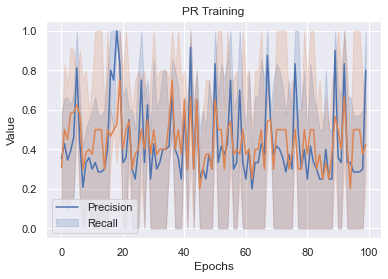

Precision Score:  0.21428571428571427
Recall Score:  1.0


In [10]:
pran = PRAN(shape = X_train.shape[1])
pran.fit(X_train = X_train, y_train = y_train, batch_rb_samples = 4, epochs = 100, batch_size = 8)
pran.plotPR()
y_pred = pran.predict(X_test)
y_pred = (y_pred>0.5).float()
print("Precision Score: ", precision_score(y_test, y_pred))
print("Recall Score: ", recall_score(y_test, y_pred))

r.
  _warn_prf(average, modifier, msg_start, len(result))
Epoch #53 - 
 Precision: 1.0 
 Recall: 0.25 

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` 

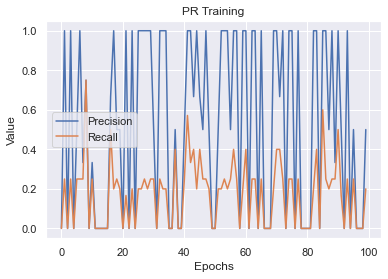

Precision Score:  0.5
Recall Score:  0.6666666666666666


In [4]:
pran = PRAN(shape = X_train.shape[1])
pran.fit(X_train = X_train, y_train = y_train, batch_rb_samples = 4, epochs = 100, batch_size = 8)
pran.plotPR()
y_pred = pran.predict(X_test)
y_pred = (y_pred>0.5).float()
print("Precision Score: ", precision_score(y_test, y_pred))
print("Recall Score: ", recall_score(y_test, y_pred))

--Initial Recall Booster Training Complete--
Epoch #0 - 
 Precision: 1.0 
 Recall: 0.3333333333333333 

Epoch #1 - 
 Precision: 1.0 
 Recall: 0.3333333333333333 

Epoch #2 - 
 Precision: 0.6666666666666666 
 Recall: 0.5 

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
Epoch #3 - 
 Precision: 1.0 
 Recall: 0.25 

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
Epoch #4 - 
 Precision: 1.0 
 Recall: 0.5 

Epoch #5 - 
 Precision: 1.0 
 R

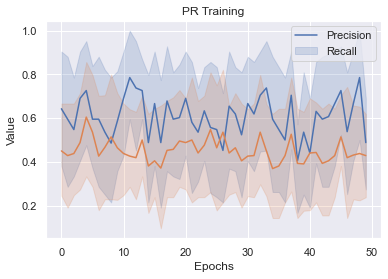

Precision Score:  1.0
Recall Score:  0.6666666666666666


In [10]:
pran = PRAN(shape = X_train.shape[1])
pran.fit(X_train = X_train, y_train = y_train, batch_rb_samples = 3, epochs = 50, batch_size = 8, lr_pb = 1e-5, lr_rb = 1e-5, l2_pb = 1e-3, l2_rb = 0)
pran.plotPR()
y_pred = pran.predict(X_test)
y_pred = (y_pred>0.5).float()
print("Precision Score: ", precision_score(y_test, y_pred))
print("Recall Score: ", recall_score(y_test, y_pred))

.5298],
        [0.4814],
        [0.4814],
        [0.5034],
        [0.5391],
        [0.5372],
        [0.4948]], grad_fn=<SigmoidBackward0>)
tensor([[0.5519],
        [0.4764],
        [0.4240],
        [0.5391],
        [0.5544],
        [0.4098],
        [0.4628],
        [0.4578],
        [0.5807],
        [0.5439]], grad_fn=<SigmoidBackward0>)
tensor([[0.4935],
        [0.4915],
        [0.4786],
        [0.5241],
        [0.5142],
        [0.5422],
        [0.4403],
        [0.5189],
        [0.4739],
        [0.4621]], grad_fn=<SigmoidBackward0>)
tensor([[0.5944],
        [0.4263],
        [0.4301],
        [0.4574],
        [0.4828],
        [0.5530],
        [0.4780],
        [0.4648],
        [0.5072],
        [0.5676]], grad_fn=<SigmoidBackward0>)
tensor([[0.5458],
        [0.5869],
        [0.4577],
        [0.4768],
        [0.4864],
        [0.4818],
        [0.5283],
        [0.5053],
        [0.5503],
        [0.4775]], grad_fn=<SigmoidBackward0>)
tensor([[0.4746],
 

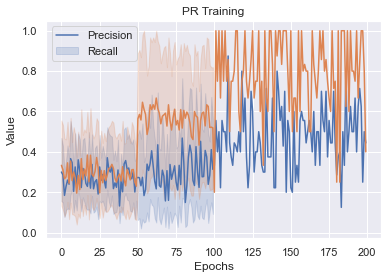

0172882, 0.47630390524864197, 0.356692910194397, 0.3623795807361603, 0.36059054732322693, 0.3633940815925598, 0.5007039904594421, 0.4594161808490753, 0.45666101574897766, 0.4798673093318939, 0.5030788779258728, 0.33574262261390686, 0.4886091947555542, 0.3781362771987915, 0.44610273838043213, 0.5326455235481262, 0.462246835231781, 0.4963177442550659, 0.43686643242836, 0.34777724742889404, 0.43959400057792664, 0.4788891077041626, 0.440918505191803, 0.48300182819366455, 0.4963306784629822, 0.32998430728912354, 0.3769177794456482, 0.5234482288360596, 0.506434977054596, 0.37471893429756165, 0.5092161893844604, 0.5109849572181702, 0.5092539191246033, 0.5131962299346924, 0.5023239850997925, 0.3737727701663971, 0.36931654810905457, 0.497762531042099, 0.3712901175022125, 0.513204038143158, 0.3785308599472046, 0.37544724345207214, 0.22799627482891083, 0.5213987827301025, 0.5145258903503418, 0.3748386800289154, 0.5072298049926758, 0.3770841360092163, 0.5124838948249817, 0.5139538049697876, 0.3711

In [20]:
import warnings
warnings.filterwarnings("ignore")

pran2 = PRAN(shape = X_train.shape[1])
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state = 1, sampling_strategy = 1.0)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
pran2.fit(X_train = X_train_resampled, y_train = y_train_resampled, epochs = 100, batch_size = 10, lr_pb = 1e-6, lr_rb = 1e-6, l2_pb = 0, l2_rb = 0, beta_pb = 0, beta_rb = 5)
pran2.plotPR()
y_pred = pran2.predict(X_test)
y_pred = (y_pred>0.5).float()
print("Precision Score: ", precision_score(y_test, y_pred))
print("Recall Score: ", recall_score(y_test, y_pred))

In [13]:
transfer_model = TransferModel(X_train.shape[1])
tensor_x = torch.Tensor(X_train_resampled)
tensor_y = torch.Tensor(y_train_resampled)
tensor_x_test = torch.Tensor(X_test)
tensor_y_test = torch.Tensor(y_test.to_numpy())
transfer_model.fit(tensor_x, tensor_y, epochs=50, lr=1e-3, batch_size=8)
precision, recall = transfer_model.evaluate(tensor_x_test, tensor_y_test)
print(precision)
print(recall)

0.75
0.375


.5309],
        [0.8290],
        [0.2565],
        [0.2112],
        [0.1958],
        [0.8832],
        [0.4184]], grad_fn=<SigmoidBackward0>)
tensor([[0.9266],
        [0.1504],
        [0.1383],
        [0.8540],
        [0.4277],
        [0.3894],
        [0.5975],
        [0.7082],
        [0.6700],
        [0.3328]], grad_fn=<SigmoidBackward0>)
tensor([[0.2658],
        [0.4369],
        [0.1237],
        [0.9194],
        [0.9055],
        [0.3648],
        [0.3157],
        [0.1726],
        [0.1436],
        [0.2318]], grad_fn=<SigmoidBackward0>)
tensor([[0.5989],
        [0.4466],
        [0.5654],
        [0.6916],
        [0.1179],
        [0.7635],
        [0.5866],
        [0.6417],
        [0.7029],
        [0.4885]], grad_fn=<SigmoidBackward0>)
tensor([[0.4182],
        [0.6918],
        [0.3205],
        [0.3448],
        [0.3341],
        [0.5830],
        [0.7244],
        [0.3945],
        [0.1431],
        [0.5843]], grad_fn=<SigmoidBackward0>)
tensor([[0.4730],
 

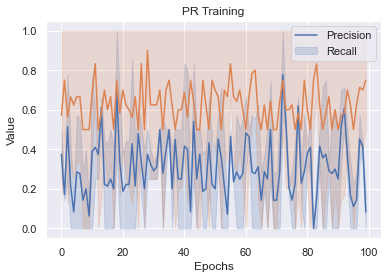

[0.6892642378807068, 0.7033311724662781, 0.6787785291671753, 0.6884480118751526, 0.7014013528823853, 0.6893622875213623, 0.6869732141494751, 0.7066600322723389, 0.7023223638534546, 0.7110032439231873, 0.678202748298645, 0.6888894438743591, 0.6940090656280518, 0.6879625916481018, 0.694760262966156, 0.6948220133781433, 0.6894686222076416, 0.7037084698677063, 0.7022616863250732, 0.6903045177459717, 0.6943804025650024, 0.704979419708252, 0.6940801739692688, 0.6868811845779419, 0.6878218054771423, 0.6939470171928406, 0.7078656554222107, 0.7031418085098267, 0.6944080591201782, 0.704611599445343, 0.7052966356277466, 0.7004958391189575, 0.6940294504165649, 0.686852216720581, 0.6945203542709351, 0.6878719925880432, 0.7036162614822388, 0.6936445832252502, 0.6941316723823547, 0.6939300298690796, 0.6851933002471924, 0.6917659044265747, 0.7050011157989502, 0.6866024732589722, 0.6954687237739563, 0.6949591636657715, 0.7036548852920532, 0.7026470303535461, 0.6801662445068359, 0.7003237009048462, 0.69

In [5]:
import warnings
warnings.filterwarnings("ignore")

pran2 = PRAN(shape = X_train.shape[1])
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state = 1, sampling_strategy = 1.0)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
pran2.fit(X_train = X_train_resampled, y_train = y_train_resampled, epochs = 100, batch_size = 10, lr_pb = 1e-6, lr_rb = 1e-6, l2_pb = 1e-3, l2_rb = 1e-3, beta_pb = 1e-1, beta_rb = 5)
pran2.plotPR()
y_pred = pran2.predict(X_test)
y_pred = (y_pred>0.5).float()
print("Precision Score: ", precision_score(y_test, y_pred))
print("Recall Score: ", recall_score(y_test, y_pred))

In [5]:
import warnings
warnings.filterwarnings("ignore")

pran2 = PRAN(shape = X_train.shape[1])
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state = 1, sampling_strategy = 1.0)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
pran2.fit(X_train = X_train, y_train = y_train, X_val = X_val, y_val = y_val, epochs = 100, batch_size = 8, lr_pb = 1e-5, lr_rb = 1e-2, l2_pb = 1e-5, l2_rb = 0, beta_pb = 0.4, beta_rb = 7)
y_pred = pran2.predict(X_test)
y_pred = (y_pred>0.5).float()
print("Precision Score: ", precision_score(y_test, y_pred))
print("Recall Score: ", recall_score(y_test, y_pred))

Precision: 0.75
Recall: 1.0 

Precision: 0.75
Recall: 1.0 

Precision Score:  0.5
Recall Score:  0.6666666666666666


Epoch #0, RB - 
 Precision: 1.0 
 Recall: 1.0

Num pos samples:  3 


Epoch #1, RB - 
 Precision: 1.0 
 Recall: 1.0

Num pos samples:  4 


Epoch #2, RB - 
 Precision: 1.0 
 Recall: 1.0

Num pos samples:  3 


Epoch #3, RB - 
 Precision: 1.0 
 Recall: 1.0

Num pos samples:  2 


Epoch #4, RB - 
 Precision: 1.0 
 Recall: 1.0

Num pos samples:  3 


Epoch #5, RB - 
 Precision: 1.0 
 Recall: 1.0

Num pos samples:  3 


Epoch #6, RB - 
 Precision: 1.0 
 Recall: 1.0

Num pos samples:  2 


Epoch #7, RB - 
 Precision: 1.0 
 Recall: 1.0

Num pos samples:  2 


Epoch #8, RB - 
 Precision: 1.0 
 Recall: 1.0

Num pos samples:  3 


Epoch #9, RB - 
 Precision: 0.6666666666666666 
 Recall: 1.0

Num pos samples:  2 


Epoch #10, RB - 
 Precision: 1.0 
 Recall: 1.0

Num pos samples:  3 


Epoch #11, RB - 
 Precision: 1.0 
 Recall: 1.0

Num pos samples:  1 


Epoch #12, RB - 
 Precision: 1.0 
 Recall: 1.0

Num pos samples:  5 


Epoch #13, RB - 
 Precision: 1.0 
 Recall: 1.0

Num pos samples:  2 


E

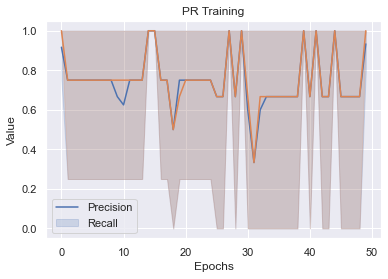

Precision Score:  0.7142857142857143
Recall Score:  0.625


In [16]:
import warnings
warnings.filterwarnings("ignore")

pran2 = PRAN(shape = X_train.shape[1])
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state = 1, sampling_strategy = 1.0)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
pran2.fit(X_train = X_train_resampled, y_train = y_train_resampled, epochs = 25, batch_size = 32, lr_pb = 1e-5, lr_rb = 1e-2, l2_pb = 1e-4, l2_rb = 0, beta_pb = 0, beta_rb = 8)
pran2.plotPR()
y_pred = pran2.predict(X_test)
y_pred = (y_pred>0.5).float()
print("Precision Score: ", precision_score(y_test, y_pred))
print("Recall Score: ", recall_score(y_test, y_pred))

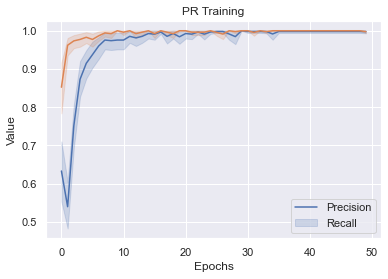

[]
[]
Precision Score:  0.3225806451612903
Recall Score:  0.625


In [26]:
import warnings
warnings.filterwarnings("ignore")

pran2 = PRAN(shape = X_train.shape[1])
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state = 1, sampling_strategy = 1.0)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
pran2.fit(X_train = X_train_resampled, y_train = y_train_resampled, epochs = 25, batch_size = 32, lr_pb = 1e-5, lr_rb = 1e-2, l2_pb = 1e-2, l2_rb = 0, beta_pb = 0, beta_rb = 8, X_test = X_test, y_test = y_test)
pran2.plotPR()
y_pred = pran2.predict(X_test)
y_pred = (y_pred>0.5).float()
print("Precision Score: ", precision_score(y_test, y_pred))
print("Recall Score: ", recall_score(y_test, y_pred))

In [43]:
import warnings
warnings.filterwarnings("ignore")

pran2 = PRAN(shape = X_train.shape[1])
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state = 1, sampling_strategy = 1.0)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
pran2.fit(X_train = X_train, y_train = y_train, epochs = 50, batch_size = 8, lr_pb = 1e-3, lr_rb = 1e-2, l2_pb = 1e-4, l2_rb = 0, beta_pb = 0, beta_rb = 5)
pran2.plotPR()
y_pred = pran2.predict(X_test)
y_pred = (y_pred>0.5).float()
print("Precision Score: ", precision_score(y_test, y_pred))
print("Recall Score: ", recall_score(y_test, y_pred))

TypeError: fit() missing 2 required positional arguments: 'X_test' and 'y_test'

In [27]:
len(np.where(y_train == 1)[0])/len(y_train)

0.23595505617977527

In [23]:
len(y_train)

178

13     1
188    0
109    1
69     1
151    0
      ..
142    0
63     0
168    0
28     0
172    0
Name: outcome, Length: 178, dtype: int64

In [22]:
transfer_model = TransferModel(X_train.shape[1])
tensor_x = torch.Tensor(X_train_resampled)
tensor_y = torch.Tensor(y_train_resampled)
tensor_x_test = torch.Tensor(X_test)
tensor_y_test = torch.Tensor(y_test.to_numpy())
transfer_model.fit(tensor_x, tensor_y, epochs=50, lr=1e-3, batch_size=32)
precision, recall = transfer_model.evaluate(tensor_x_test, tensor_y_test)
print(precision)
print(recall)

0.46153846153846156
0.8


Epoch #0, RB - 
 Precision: 0.0 
 Recall: 0.0

Num pos samples:  1 


Epoch #1, RB - 
 Precision: 0.0 
 Recall: 0.0

Num pos samples:  0 


Epoch #2, RB - 
 Precision: 0.0 
 Recall: 0.0

Num pos samples:  1 


Epoch #3, RB - 
 Precision: 0.0 
 Recall: 0.0

Num pos samples:  1 


Epoch #4, RB - 
 Precision: 0.0 
 Recall: 0.0

Num pos samples:  0 


Epoch #5, RB - 
 Precision: 0.0 
 Recall: 0.0

Num pos samples:  0 


Epoch #6, RB - 
 Precision: 0.5 
 Recall: 1.0

Num pos samples:  1 


Epoch #7, RB - 
 Precision: 0.0 
 Recall: 0.0

Num pos samples:  1 


Epoch #8, RB - 
 Precision: 0.5 
 Recall: 1.0

Num pos samples:  1 


Epoch #9, RB - 
 Precision: 0.0 
 Recall: 0.0

Num pos samples:  0 


Epoch #10, RB - 
 Precision: 0.0 
 Recall: 0.0

Num pos samples:  0 


Epoch #11, RB - 
 Precision: 0.5 
 Recall: 1.0

Num pos samples:  1 


Epoch #12, RB - 
 Precision: 0.0 
 Recall: 0.0

Num pos samples:  0 


Epoch #13, RB - 
 Precision: 0.0 
 Recall: 0.0

Num pos samples:  0 


Epoch #14, RB - 

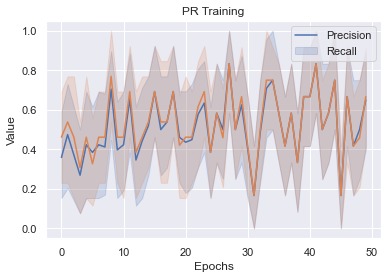

Precision Score:  1.0
Recall Score:  0.4


In [40]:
import warnings
warnings.filterwarnings("ignore")

pran2 = PRAN(shape = X_train.shape[1])
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state = 1, sampling_strategy = 1.0)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
pran2.fit(X_train = X_train, y_train = y_train, epochs = 50, batch_size = 8, lr_pb = 1e-4, lr_rb = 1e-3, l2_pb = 1e-4, l2_rb = 0, beta_pb = 0, beta_rb = 5)
pran2.plotPR()
y_pred = pran2.predict(X_test)
y_pred = (y_pred>0.5).float()
print("Precision Score: ", precision_score(y_test, y_pred))
print("Recall Score: ", recall_score(y_test, y_pred))

In [17]:
transfer_model = TransferModel(X_train.shape[1])
tensor_x = torch.Tensor(X_train)
tensor_y = torch.Tensor(y_train)
tensor_x_test = torch.Tensor(X_test)
tensor_y_test = torch.Tensor(y_test.to_numpy())
transfer_model.fit(tensor_x, tensor_y, epochs=50, lr=1e-3, batch_size=8)
precision, recall = transfer_model.evaluate(tensor_x_test, tensor_y_test)
print(precision)
print(recall)

0.42857142857142855
0.5


Epoch #0, RB - 
 Precision: 1.0 
 Recall: 0.75

Num pos samples:  4 


Epoch #1, RB - 
 Precision: 1.0 
 Recall: 1.0

Num pos samples:  1 


Epoch #2, RB - 
 Precision: 1.0 
 Recall: 1.0

Num pos samples:  2 


Epoch #3, RB - 
 Precision: 1.0 
 Recall: 1.0

Num pos samples:  3 


Epoch #4, RB - 
 Precision: 1.0 
 Recall: 1.0

Num pos samples:  3 


Epoch #5, RB - 
 Precision: 1.0 
 Recall: 1.0

Num pos samples:  3 


Epoch #6, RB - 
 Precision: 1.0 
 Recall: 1.0

Num pos samples:  2 


Epoch #7, RB - 
 Precision: 1.0 
 Recall: 1.0

Num pos samples:  3 


Epoch #8, RB - 
 Precision: 1.0 
 Recall: 1.0

Num pos samples:  1 


Epoch #9, RB - 
 Precision: 1.0 
 Recall: 1.0

Num pos samples:  2 


Epoch #10, RB - 
 Precision: 1.0 
 Recall: 1.0

Num pos samples:  2 


Epoch #11, RB - 
 Precision: 1.0 
 Recall: 1.0

Num pos samples:  3 


Epoch #12, RB - 
 Precision: 1.0 
 Recall: 1.0

Num pos samples:  2 


Epoch #13, RB - 
 Precision: 1.0 
 Recall: 1.0

Num pos samples:  3 


Epoch #14, RB -

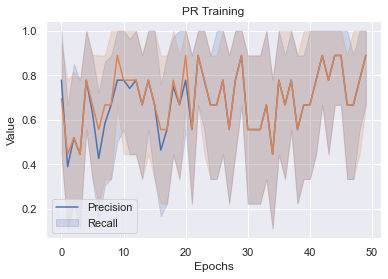

Precision Score:  0.6666666666666666
Recall Score:  0.6666666666666666


In [13]:
import warnings
warnings.filterwarnings("ignore")

pran2 = PRAN(shape = X_train.shape[1])
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state = 1, sampling_strategy = 1.0)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
pran2.fit(X_train = X_train_resampled, y_train = y_train_resampled, epochs = 50, batch_size = 8, lr_pb = 1e-2, lr_rb = 1e-2, l2_pb = 1e-4, l2_rb = 0, beta_pb = 0, beta_rb = 3, X_test = X_test, y_test = y_test)
pran2.plotPR()
y_pred = pran2.predict(X_test)
y_pred = (y_pred>0.5).float()
print("Precision Score: ", precision_score(y_test, y_pred))
print("Recall Score: ", recall_score(y_test, y_pred))

In [23]:
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import f1_score
kf = StratifiedKFold(n_splits=10)
pran_precisions = []
pran_recalls = []
pran_f1 = []
control_precisions = []
control_recalls = []
control_f1 = []
X = df[[col for col in df.columns if col != 'Class']].to_numpy()
y = df['Class'].to_numpy()
epoch = 0
for train_index, test_index in kf.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    sc = StandardScaler()
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)

    pran = PRAN(shape = X_train.shape[1])
    pran.fit(X_train = X_train, y_train = y_train, epochs = 50, batch_size = 8, lr_pb = 1e-3, lr_rb = 1e-2, l2_pb = 1e-4, l2_rb = 0, beta_pb = 0, beta_rb = 7, X_test=X_test, y_test=y_test)
    # pran.fit(X_train = X_train, y_train = y_train, epochs = 50, batch_size = 4, lr_pb = 1e-5, lr_rb = 1e-2, l2_pb = 1e-4, l2_rb = 0, beta_pb = 0, beta_rb = 10, X_test = X_test, y_test = y_test)
    y_pred = pran.predict(X_test)
    y_pred = (y_pred>0.5).float()
    pran_precisions.append(precision_score(y_test, y_pred))
    pran_recalls.append(recall_score(y_test, y_pred))
    pran_f1.append(f1_score(y_test, y_pred))

    transfer_model = TransferModel(X_train.shape[1])
    tensor_x = torch.Tensor(X_train)
    tensor_y = torch.Tensor(y_train)
    tensor_x_test = torch.Tensor(X_test)
    tensor_y_test = torch.Tensor(y_test)
    transfer_model.fit(tensor_x, tensor_y, epochs=50, lr=1e-3, batch_size=8)
    precision, recall = transfer_model.evaluate(tensor_x_test, tensor_y_test)
    control_precisions.append(precision)
    control_recalls.append(recall)
    yhat = (transfer_model(tensor_x_test) > 0.5).float()
    control_f1.append(f1_score(y_test, yhat))

    print(f"Epoch: {epoch}")
    epoch += 1
    
print("Median PRAN Precision: ", np.median(pran_precisions))
print("Median PRAN Recall: ", np.median(pran_recalls))
print("Median PRAN F1: ", np.median(pran_f1))
print("Median Control Precision: ", np.median(control_precisions))
print("Median Control Recall: ", np.median(control_recalls))
print("Median Control F1: ", np.median(control_f1))


Epoch: 0
Epoch: 1
Epoch: 2
Epoch: 3
Epoch: 4
Epoch: 5
Epoch: 6
Epoch: 7
Epoch: 8
Epoch: 9
Median PRAN Precision:  0.6333333333333333
Median PRAN Recall:  0.6666666666666666
Median PRAN F1:  0.5833333333333333
Median Control Precision:  0.5833333333333333
Median Control Recall:  0.5833333333333333
Median Control F1:  0.4722222222222222


In [8]:
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import f1_score
kf = StratifiedKFold(n_splits=10)
pran_precisions = []
pran_recalls = []
pran_f1 = []
control_precisions = []
control_recalls = []
control_f1 = []
X = df[[col for col in df.columns if col != 'Class']].to_numpy()
y = df['Class'].to_numpy()
epoch = 0
for train_index, test_index in kf.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    sc = StandardScaler()
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)

    pran = PRAN(shape = X_train.shape[1])
    pran.fit(X_train = X_train, y_train = y_train, epochs = 50, batch_size = 8, lr_pb = 1e-3, lr_rb = 1e-2, l2_pb = 1e-3, l2_rb = 0, beta_pb = 0, beta_rb = 7, X_test=X_test, y_test=y_test)
    # pran.fit(X_train = X_train, y_train = y_train, epochs = 50, batch_size = 4, lr_pb = 1e-5, lr_rb = 1e-2, l2_pb = 0, l2_rb = 0, beta_pb = 0, beta_rb = 5, X_test = X_test, y_test = y_test)
    y_pred = pran.predict(X_test)
    y_pred = (y_pred>0.5).float()
    pran_precisions.append(precision_score(y_test, y_pred))
    pran_recalls.append(recall_score(y_test, y_pred))
    pran_f1.append(f1_score(y_test, y_pred))

    transfer_model = TransferModel(X_train.shape[1])
    tensor_x = torch.Tensor(X_train)
    tensor_y = torch.Tensor(y_train)
    tensor_x_test = torch.Tensor(X_test)
    tensor_y_test = torch.Tensor(y_test)
    transfer_model.fit(tensor_x, tensor_y, epochs=50, lr=1e-3, batch_size=8)
    precision, recall = transfer_model.evaluate(tensor_x_test, tensor_y_test)
    control_precisions.append(precision)
    control_recalls.append(recall)
    yhat = (transfer_model(tensor_x_test) > 0.5).float()
    control_f1.append(f1_score(y_test, yhat))

    print(f"Epoch: {epoch}")
    epoch += 1
    
print("Median PRAN Precision: ", np.median(pran_precisions))
print("Median PRAN Recall: ", np.median(pran_recalls))
print("Median PRAN F1: ", np.median(pran_f1))
print("Median Control Precision: ", np.median(control_precisions))
print("Median Control Recall: ", np.median(control_recalls))
print("Median Control F1: ", np.median(control_f1))


Epoch: 0
Epoch: 1
Epoch: 2
Epoch: 3
Epoch: 4
Epoch: 5
Epoch: 6
Epoch: 7
Epoch: 8
Epoch: 9
Median PRAN Precision:  0.5833333333333333
Median PRAN Recall:  0.6666666666666666
Median PRAN F1:  0.6190476190476191
Median Control Precision:  0.55
Median Control Recall:  0.5833333333333333
Median Control F1:  0.5227272727272727


In [23]:
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import f1_score
kf = StratifiedKFold(n_splits=5)
pran_precisions = []
pran_recalls = []
pran_f1 = []
control_precisions = []
control_recalls = []
control_f1 = []
X = df[[col for col in df.columns if col != 'class']].to_numpy()
y = df['class'].to_numpy()
epoch = 0
for train_index, test_index in kf.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    sc = StandardScaler()
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)

    pran = PRAN(shape = X_train.shape[1])
    pran.fit(X_train = X_train, y_train = y_train, epochs = 25, batch_size = 32, lr_pb = 1e-5, lr_rb = 1e-2, l2_pb = 1e-4, l2_rb = 0, beta_pb = 0, beta_rb = 8, X_test = X_test, y_test = y_test)
    # pran.fit(X_train = X_train, y_train = y_train, epochs = 50, batch_size = 4, lr_pb = 1e-5, lr_rb = 1e-2, l2_pb = 0, l2_rb = 0, beta_pb = 0, beta_rb = 5, X_test = X_test, y_test = y_test)
    y_pred = pran.predict(X_test)
    y_pred = (y_pred>0.5).float()
    pran_precisions.append(precision_score(y_test, y_pred))
    pran_recalls.append(recall_score(y_test, y_pred))
    pran_f1.append(f1_score(y_test, y_pred))

    transfer_model = TransferModel(X_train.shape[1])
    tensor_x = torch.Tensor(X_train)
    tensor_y = torch.Tensor(y_train)
    tensor_x_test = torch.Tensor(X_test)
    tensor_y_test = torch.Tensor(y_test)
    transfer_model.fit(tensor_x, tensor_y, epochs=50, lr=1e-3, batch_size=8)
    precision, recall = transfer_model.evaluate(tensor_x_test, tensor_y_test)
    control_precisions.append(precision)
    control_recalls.append(recall)
    yhat = (transfer_model(tensor_x_test) > 0.5).float()
    control_f1.append(f1_score(y_test, yhat))

    print(f"Epoch: {epoch}")
    epoch += 1
    
print("Median PRAN Precision: ", np.median(pran_precisions))
print("Median PRAN Recall: ", np.median(pran_recalls))
print("Median PRAN F1: ", np.median(pran_f1))
print("Median Control Precision: ", np.median(control_precisions))
print("Median Control Recall: ", np.median(control_recalls))
print("Median Control F1: ", np.median(control_f1))


Epoch: 0
Epoch: 1
Epoch: 2
Epoch: 3
Epoch: 4
Median PRAN Precision:  0.6111111111111112
Median PRAN Recall:  0.4375
Median PRAN F1:  0.2222222222222222
Median Control Precision:  0.7142857142857143
Median Control Recall:  0.6666666666666666
Median Control F1:  0.625


In [9]:
pran_precisions

[0.0,
 0.0,
 0.0,
 0.0,
 0.6,
 1.0,
 0.6,
 0.6666666666666666,
 0.3333333333333333,
 0.0]

In [10]:
control_precisions

[0.0,
 0.3333333333333333,
 0.6666666666666666,
 1.0,
 0.75,
 1.0,
 0.75,
 0.6666666666666666,
 0.375,
 0.2857142857142857]

In [11]:
pran_recalls

[0.0,
 0.0,
 0.0,
 0.0,
 0.75,
 0.3333333333333333,
 1.0,
 0.6666666666666666,
 0.6666666666666666,
 0.0]

In [12]:
control_recalls

[0.0,
 0.3333333333333333,
 0.6666666666666666,
 0.5,
 0.75,
 0.6666666666666666,
 1.0,
 0.6666666666666666,
 1.0,
 0.6666666666666666]

In [82]:
df[[col for col in df.columns if col != 'Class']]

,AGE,SEX,STEROID,ANTIVIRALS,FATIGUE,MALAISE,ANOREXIA,LIVER BIG,LIVER FIRM,SPLEEN PALPABLE,SPIDERS,ASCITES,VARICES,BILIRUBIN,ALK PHOSPHATE,SGOT,ALBUMIN,PROTIME,HISTOLOGY
0,30,2,1,2,2,2,2,1,2,2,2,2,2,1.0,85.000000,18.0,4.0,61.852273,1
1,50,1,1,2,1,2,2,1,2,2,2,2,2,0.9,135.000000,42.0,3.5,61.852273,1
2,78,1,2,2,1,2,2,2,2,2,2,2,2,0.7,96.000000,32.0,4.0,61.852273,1
3,31,1,2,1,2,2,2,2,2,2,2,2,2,0.7,46.000000,52.0,4.0,80.000000,1
4,34,1,2,2,2,2,2,2,2,2,2,2,2,1.0,105.325397,200.0,4.0,61.852273,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,46,1,2,2,1,1,1,2,2,2,1,1,1,7.6,105.325397,242.0,3.3,50.000000,2
151,44,1,2,2,1,2,2,2,1,2,2,2,2,0.9,126.000000,142.0,4.3,61.852273,2
152,61,1,1,2,1,1,2,1,1,2,1,2,2,0.8,75.000000,20.0,4.1,61.852273,2
153,53,2,1,2,1,2,2,2,2,1,1,2,1,1.5,81.000000,19.0,4.1,48.000000,2


In [ ]:
X_train = X_train, y_train = y_train, X_val = X_val, y_val = y_val, epochs = 100, batch_size = 8, lr_pb = 1e-5, lr_rb = 1e-2, l2_pb = 1e-5, l2_rb = 0, beta_pb = 0.4, beta_rb = 7

In [6]:
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import f1_score
kf = StratifiedKFold(n_splits=5)
pran_precisions = []
pran_recalls = []
pran_f1 = []
control_precisions = []
control_recalls = []
control_f1 = []
X = df[[col for col in df.columns if col != 'Class']].to_numpy()
y = df['Class'].to_numpy()
epoch = 0
for train_index, test_index in kf.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=1, stratify=y_train)

    sc = StandardScaler()
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)
    X_val = sc.transform(X_val)

    pran = PRAN(shape = X_train.shape[1])
    pran.fit(X_train = X_train, y_train = y_train, X_val = X_val, y_val = y_val, epochs = 50, batch_size = 8, lr_pb = 1e-5, lr_rb = 1e-3, l2_pb = 1e-4, l2_rb = 0, beta_pb = 0, beta_rb = 7)
    # pran.fit(X_train = X_train, y_train = y_train, epochs = 50, batch_size = 4, lr_pb = 1e-5, lr_rb = 1e-2, l2_pb = 0, l2_rb = 0, beta_pb = 0, beta_rb = 5, X_test = X_test, y_test = y_test)
    y_pred = pran.predict(X_test)
    y_pred = (y_pred>0.5).float()
    pran_precisions.append(precision_score(y_test, y_pred))
    pran_recalls.append(recall_score(y_test, y_pred))
    pran_f1.append(f1_score(y_test, y_pred))

    transfer_model = TransferModel(X_train.shape[1])
    tensor_x = torch.Tensor(X_train)
    tensor_y = torch.Tensor(y_train)
    tensor_x_test = torch.Tensor(X_test)
    tensor_y_test = torch.Tensor(y_test)
    transfer_model.fit(tensor_x, tensor_y, epochs=50, lr=1e-3, batch_size=8)
    precision, recall = transfer_model.evaluate(tensor_x_test, tensor_y_test)
    control_precisions.append(precision)
    control_recalls.append(recall)
    yhat = (transfer_model(tensor_x_test) > 0.5).float()
    control_f1.append(f1_score(y_test, yhat))

    print(f"Epoch: {epoch}")
    epoch += 1
    
print("Median PRAN Precision: ", np.median(pran_precisions))
print("Median PRAN Recall: ", np.median(pran_recalls))
print("Median PRAN F1: ", np.median(pran_f1))
print("Median Control Precision: ", np.median(control_precisions))
print("Median Control Recall: ", np.median(control_recalls))
print("Median Control F1: ", np.median(control_f1))


Precision: 0.5
Recall: 0.3333333333333333 

Precision: 0.5
Recall: 0.3333333333333333 

Epoch: 0
Precision: 0.0
Recall: 0.0 

Precision: 0.0
Recall: 0.0 

Epoch: 1
Precision: 0.0
Recall: 0.0 

Precision: 0.0
Recall: 0.0 

Epoch: 2
Precision: 0.0
Recall: 0.0 

Precision: 0.0
Recall: 0.0 

Epoch: 3
Precision: 0.0
Recall: 0.0 

Precision: 0.0
Recall: 0.0 

Epoch: 4
Median PRAN Precision:  0.3684210526315789
Median PRAN Recall:  0.5
Median PRAN F1:  0.5384615384615384
Median Control Precision:  0.6666666666666666
Median Control Recall:  0.3333333333333333
Median Control F1:  0.4444444444444444
